In [1]:
import os
import pandas as pd
import seaborn as sns

In [2]:
%pwd

'/home/rohwid/Pacmann/lazada-id-reviews/notebooks'

In [3]:
# Change to the main directory
# So, it's executed from main directory
os.chdir("../")

In [4]:
%pwd

'/home/rohwid/Pacmann/lazada-id-reviews'

In [5]:
dataset_items = pd.read_csv("artifacts/data-ingestion/items.csv")
dataset_reviews = pd.read_csv("artifacts/data-ingestion/reviews.csv")

In [6]:
data_categories = pd.read_csv("artifacts/data-ingestion/category.csv")
data_categories = data_categories['category']
data_categories

0    beli-harddisk-eksternal
1                beli-laptop
2              beli-smart-tv
3          jual-flash-drives
4      shop-televisi-digital
Name: category, dtype: object

In [7]:
dataset_items.shape, dataset_reviews.shape

((10942, 9), (203787, 15))

In [8]:
pd.set_option("display.max_rows", dataset_reviews.shape[0])
pd.set_option("display.max_columns", dataset_reviews.shape[1])

Take a look the data visually for initial EDA.

In [9]:
dataset_items.head()

,itemId,category,name,brandName,url,price,averageRating,totalReviews,retrievedDate
0,100002528,beli-harddisk-eksternal,"TOSHIBA Smart HD LED TV 32"" - 32L5650VJ Free B...",Toshiba,https://www.lazada.co.id/products/toshiba-smar...,2499000,4,8,2019-10-02
1,100003785,beli-harddisk-eksternal,"TOSHIBA Full HD Smart LED TV 40"" - 40L5650VJ -...",Toshiba,https://www.lazada.co.id/products/toshiba-full...,3788000,3,3,2019-10-02
2,100004132,beli-harddisk-eksternal,Samsung 40 Inch Full HD Flat LED Digital TV 4...,LG,https://www.lazada.co.id/products/samsung-40-i...,3850000,3,2,2019-10-02
3,100004505,beli-harddisk-eksternal,"Sharp HD LED TV 24"" - LC-24LE175I - Hitam",Sharp,https://www.lazada.co.id/products/sharp-hd-led...,1275000,3,11,2019-10-02
4,100005037,beli-harddisk-eksternal,Lenovo Ideapad 130-15AST LAPTOP MULTIMEDIA I A...,Lenovo,https://www.lazada.co.id/products/lenovo-ideap...,3984100,5,1,2019-10-02


In [10]:
dataset_reviews.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,423343484,beli-harddisk-eksternal,Agus S.,5,NaN,NaN,NaN,0,0,0,True,18.01,31 Mar 2019,androidApp,2019-10-02
1,423343484,beli-harddisk-eksternal,Agus S.,5,NaN,NaN,mantap,0,0,0,True,18.01,11 Mar 2019,androidApp,2019-10-02
2,423343954,beli-harddisk-eksternal,Alvi I.,5,NaN,NaN,Bagus dan sesuai👍👍,0,0,0,True,31.51,05 Mei 2019,iosApp,2019-10-02
3,423343954,beli-harddisk-eksternal,ajeng P.,5,NaN,NaN,NaN,0,0,0,True,18.67,24 Jan 2019,androidApp,2019-10-02
4,423343954,beli-harddisk-eksternal,widya C.,5,NaN,NaN,NaN,0,0,0,True,17.01,12 Feb 2019,androidApp,2019-10-02


In [11]:
dataset_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23399 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


`dataset_items` seems like doesn’t have reviews content, so we would use `dataset_reviews` instead.

In [12]:
del dataset_items, data_categories

In [13]:
dataset = dataset_reviews[["rating", "reviewContent"]].copy()

In [14]:
dataset.head()

,rating,reviewContent
0,5,NaN
1,5,mantap
2,5,Bagus dan sesuai👍👍
3,5,NaN
4,5,NaN


In `dataset_reviews`, we'd like to use only `rating` and `reviewContent` columns. This is the most minimum effort to getting to know the model least performance.

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   rating         203787 non-null  int64 
 1   reviewContent  107029 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [16]:
dataset.isnull().sum()

rating               0
reviewContent    96758
dtype: int64

Now let's take a look the distribution of rating.

We could oversampling the least class, but for this time, we would let this as it is.

The summary:
+ Only select `rating` and `reviewContent`.
+ Droping the null `reviewContent` value.

<Axes: xlabel='rating', ylabel='count'>

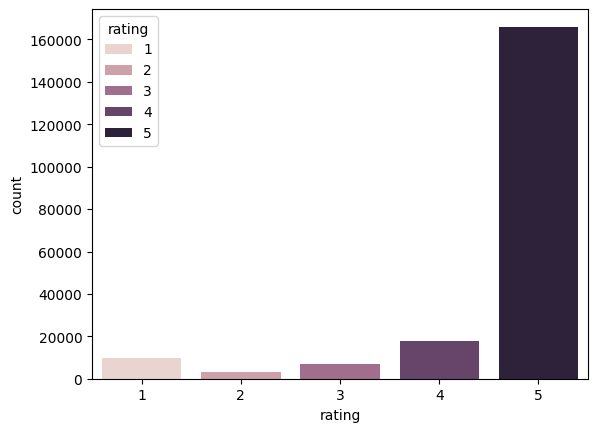

In [17]:
sns.countplot(data=dataset, x="rating", hue="rating")